In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
df_erosion = pd.read_csv("o-ring-erosion-only.csv"
                         , names = ['Number of O-ring at risk on a given flight', 'Number experiencing thermal distress'
                                   , 'Launch temperature(degrees F)', 'Leak-check pressure(psi)', 'Temporal order of flight'])

In [3]:
df_erosion.describe()    #对数据框df_erosion进行探索性分析

,Number of O-ring at risk on a given flight,Number experiencing thermal distress,Launch temperature(degrees F),Leak-check pressure(psi),Temporal order of flight
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.391304,69.565217,152.173913,12.00000
std,0.0,0.656376,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


Text(0.5, 1.0, '因变量‘Number experiencing thermal distress’频数分布直方图')

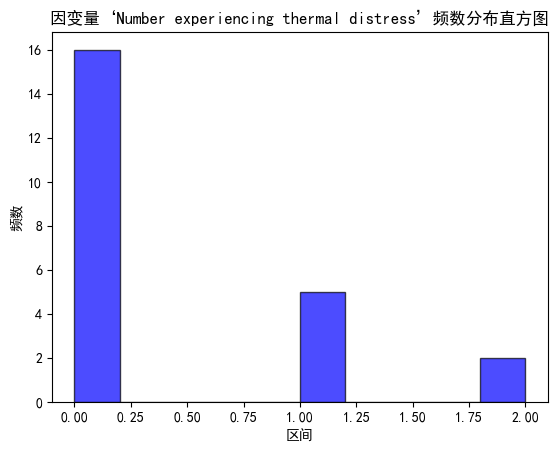

In [10]:
#绘制直方图
plt.hist(df_erosion['Number experiencing thermal distress']
         , bins = 10
         , facecolor = "blue"
         , edgecolor = "black"
         , alpha = 0.7)

plt.rcParams['font.family'] = "simHei"
plt.xlabel('区间')
plt.ylabel('频数')
plt.title("因变量‘Number experiencing thermal distress’频数分布直方图")

In [14]:
#查看因变量的均值和方差
print(np.mean(df_erosion['Number experiencing thermal distress']))
print(np.var(df_erosion['Number experiencing thermal distress']))

0.391304347826087
0.41209829867674863


In [15]:
#方差约等于平均值，避免了在泊松分布中发生过度分散或分散不足的情况

In [18]:
#数据准备
df_erosion.rename(columns = {'Number of O-ring at risk on a given flight':'num_rings'
                             , 'Launch temperature(degrees F)':'temperature'
                             , 'Leak-check pressure(psi)':'pressure'
                             , 'Number experiencing thermal distress':'num_distress'
                             , 'Temporal order of flight':'order'}
                  , inplace = True)
order = ['num_rings', 'temperature', 'pressure', 'order', 'num_distress']
df_erosion = df_erosion[order]
df_erosion.head()

,num_rings,temperature,pressure,order,num_distress
0,6,66,50,1,0
1,6,70,50,2,1
2,6,69,50,3,0
3,6,68,50,4,0
4,6,67,50,5,0


In [20]:
#建模分析
x = np.column_stack((df_erosion['num_rings']
                     , df_erosion['temperature']
                     , df_erosion['pressure']
                     , df_erosion['order']))

In [22]:
#使用GLM()方法进行泊松回归
glm = smf.glm('num_distress ~ num_rings + temperature + pressure + order'
              , df_erosion,family = sm.families.Poisson())

In [23]:
results = glm.fit()   #获取拟合结果
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_distress   No. Observations:                   23
Model:                            GLM   Df Residuals:                       19
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.317
Date:                Wed, 27 Mar 2024   Deviance:                       15.407
Time:                        10:16:43   Pearson chi2:                     23.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2633
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0984      0.090      1.094      

In [24]:
#只有自变量temperature的p值小于0.05，通过了T检验。这意味着其他解释变量在控制temperature的前提下，对因变量的影响不显著

In [28]:
#建立的泊松回归模型预测结果
df_erosion['predict_result'] = results.predict(df_erosion)
df_erosion['predict_result'] = df_erosion['predict_result'].apply(lambda x:round(x,3))
df_erosion

,num_rings,temperature,pressure,order,num_distress,predict_result
0,6,66,50,1,0,0.161
1,6,70,50,2,1,0.114
2,6,69,50,3,0,0.126
3,6,68,50,4,0,0.140
4,6,67,50,5,0,0.154
5,6,72,50,6,0,0.100
6,6,73,100,7,0,0.132
7,6,70,100,8,0,0.174
8,6,57,200,9,1,1.118
9,6,63,200,10,1,0.666


In [30]:
#采用均方根误差来评估模型预测结果
print("RMSE:", np.sqrt(mean_squared_error(df_erosion.predict_result, df_erosion.num_distress)))

RMSE: 0.4895481057323038
